In [3]:
import os
import torch
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, SubsetRandomSampler
from torchvision import transforms
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
class DropDataset(Dataset):
    def __init__(self, folder, file_fmt, transform=None):
        self.transform = transform
        
        images = sorted([os.path.join(folder, name) for name 
            in os.listdir(folder) if name.endswith(file_fmt)])

        masks = sorted([os.path.join(folder, name) for name
            in os.listdir(folder) if "_mask" in name])
        self.pairs = list(zip(images, masks))

    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, index: int) -> tuple[torch.Tensor]:        
        
        #file path tuple
        img, mask = self.pairs[index]
        #read data as numpy array
        img = np.array(Image.open(img))
        mask = np.load(mask,allow_pickle=True)
        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask)
        
        return img, mask

In [5]:
def visualize_samples(dataset, indices, title=None, count=10):
    # visualize random 10 samples
    plt.figure(figsize=(count*3,6))
    display_indices = indices[:count]
    if title:
        plt.suptitle("%s %s/%s" % (title, len(display_indices), len(indices)))        
    for i, index in enumerate(display_indices):    
        x, y = dataset[index]
        plt.subplot(2,count,i+1)
        plt.imshow(x.squeeze())
        plt.grid(False)
        plt.axis('off')   
        plt.subplot(2,count,i+1 + count)
        plt.imshow(y.squeeze())
        plt.grid(False)
        plt.axis('off')   

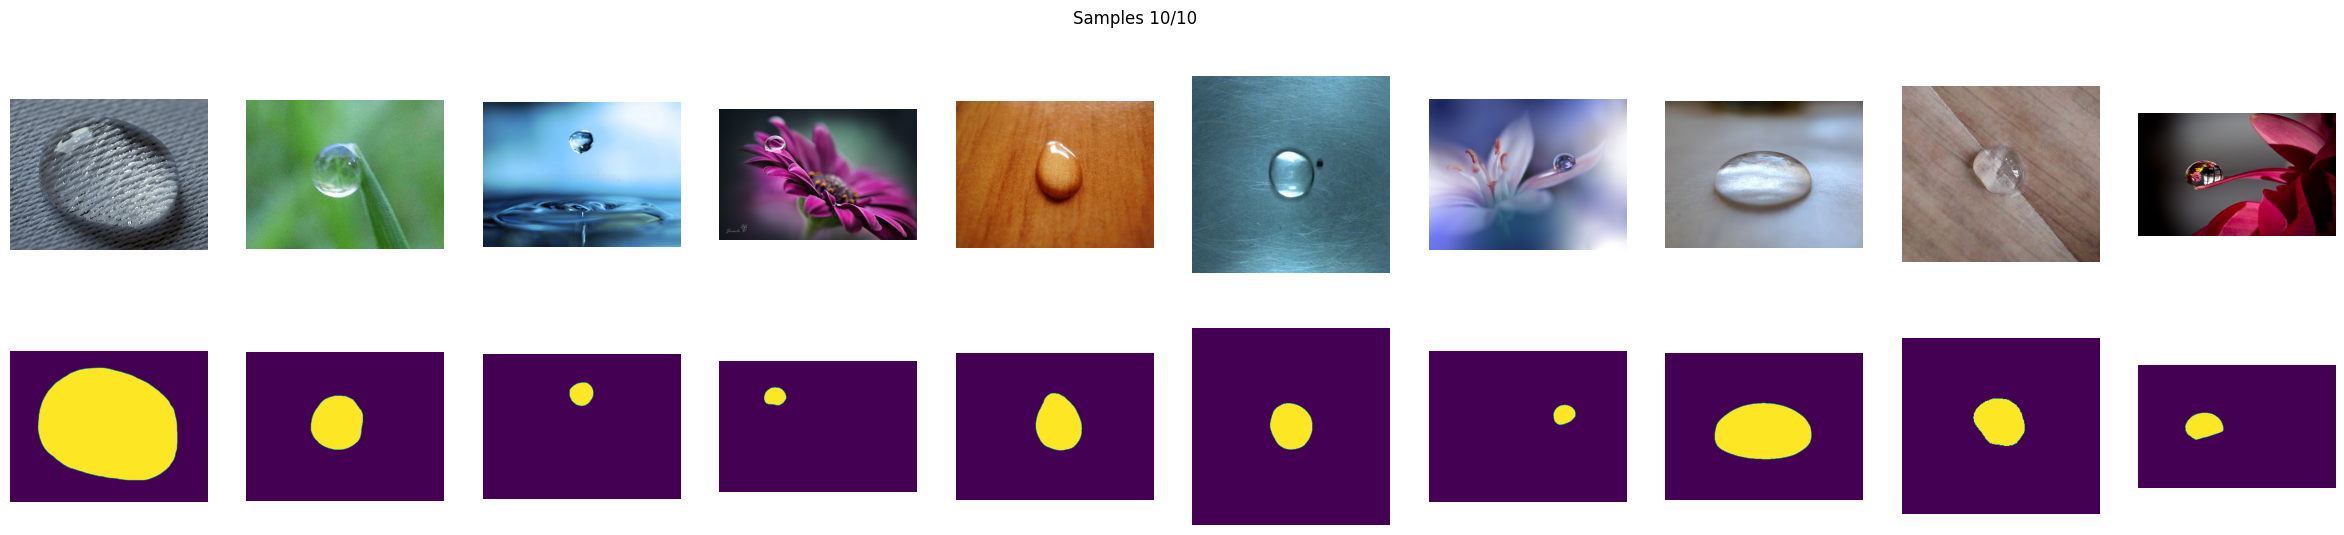

In [23]:
orig_dataset = DropDataset("data", "jpg")
indices = np.random.choice(np.arange(len(orig_dataset)),10 , replace=False)

visualize_samples(orig_dataset, indices, "Samples")
